In [2]:
!pip install numpy
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


TASK 1 Data Loading and Inspection
   - Load the sales, customer, and product datasets into Pandas DataFrames.
   - Inspect the data for missing values, inconsistencies, and outliers.


In [4]:
# Load the sales dataset
file_name = '/content/sales_data_sample.csv'

data = pd.read_csv(file_name, encoding='latin1')

#information about the dataset
print("Information:")
data.info()

#first 5 rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

#missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)

#outliers using summary statistics
print("\nSummary Statistics:")
summary_statistics = data.describe()
print(summary_statistics)

FileNotFoundError: [Errno 2] No such file or directory: '/content/sales_data_sample.csv'

In [ ]:
#plot for 'QUANTITYORDERED'
plt.figure(figsize=(5, 3))
data.boxplot(column=['QUANTITYORDERED'])
plt.title('Box plot of QUANTITYORDERED')
plt.show()

#plot for 'PRICEEACH'
plt.figure(figsize=(5, 3))
data.boxplot(column=['PRICEEACH'])
plt.title('Box plot of PRICEEACH')
plt.show()

#plot for 'SALES'
plt.figure(figsize=(5, 3))
data.boxplot(column=['SALES'])
plt.title('Box plot of SALES')
plt.show()



TASK 2 Object-Oriented Programming (OOP) Implementation
   - Define classes for Customer, Product, and SalesTransaction.
   - Implement constructors and destructors for these classes.
   - Demonstrate inheritance by creating a subclass for a specific type of customer (e.g., VIPCustomer) that inherits from the Customer class.


In [5]:
#Define classes for Customer, Product, and SalesTransaction.
#Create Class class
class Customer:
    def __init__(self, customer_name, phone_number):
        self.customer_name = customer_name
        self.phone_number = phone_number
        print("Customer",self.customer_name, "created.")

    def __del__(self):
        print("Customer",self.customer_name, "destroyed.")
#Create Product class
class Product:
    def __init__(self, product_code, product_line):
        self.product_code = product_code
        self.product_line = product_line
        print("Product",self.product_code, "created.")

    def __del__(self):
        print("Product",self.product_code, "destroyed.")
#Create SalesTransaction class
class SalesTransaction:
    def __init__(self, order_number, quantity_ordered, sales, customer, product):
        self.order_number = order_number
        self.quantity_ordered = quantity_ordered
        self.sales = sales
        self.customer = customer
        self.product = product
        print("SalesTransaction", self.order_number, "created.")

    def __del__(self):
        print("SalesTransaction", self.order_number, "destroyed.")



In [6]:
# Demonstrating inheritance
class VIPCustomer(Customer):

    def __init__(self, customer_name, phone_number, priority):
        super().__init__(customer_name, phone_number)
        self.priority = priority
        print("VIPCustomer" ,self.customer_name, "with level" ,self.priority, "created.")

    def __del__(self): # Corrected method name to __del__
        print("VIPCustomer" ,self.customer_name, "destroyed.")


In [7]:
customer = Customer("elon musk", "8819022912")
product = Product("al2321", "IPHONE")

transaction = SalesTransaction(
    order_number=52,
    quantity_ordered=14,
    sales=70000.00,
    customer=customer,
    product=product
)

vip_customer = VIPCustomer("mukesh ambani","9810222862", "VIP")


Customer elon musk created.
Product al2321 created.
SalesTransaction 52 created.
Customer mukesh ambani created.
VIPCustomer mukesh ambani with level VIP created.


TASK 3 Data Cleaning and Transformation
   - Handle missing values and correct data inconsistencies.
   - Transform data types where necessary (e.g., date formatting).
   - Merge the datasets to create a unified DataFrame for analysis.


In [8]:
import pandas as pd
from google.colab import files


In [9]:
# Load the sales dataset
uploaded = files.upload()
file_name = 'sales_data_sample.csv'
data = pd.read_csv(file_name, encoding='latin1')

#Handle missing values and correct data inconsistencies.

#Dropping unwanted columns
data.drop(columns=['ADDRESSLINE2', 'STATE', 'TERRITORY'], inplace=True)
# Filling missing values in POSTALCODE column
data['POSTALCODE'].fillna('Unknown', inplace=True)

# Transform data types where necessary (e.g., date formatting).
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
# Simulate customer and product DataFrames
customer_data = data[['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY']].drop_duplicates()
product_data = data[['PRODUCTCODE', 'PRODUCTLINE', 'MSRP']].drop_duplicates()

#Merge the datasets to create a unified DataFrame for analysis.
merged_data = data.merge(customer_data, on='CUSTOMERNAME').merge(product_data, on='PRODUCTCODE')

# Display basic information and a sample of the merged dataset
print(merged_data.info())
print(merged_data.head())

Saving sales_data_sample.csv to sales_data_sample.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ORDERNUMBER         2823 non-null   int64         
 1   QUANTITYORDERED     2823 non-null   int64         
 2   PRICEEACH           2823 non-null   float64       
 3   ORDERLINENUMBER     2823 non-null   int64         
 4   SALES               2823 non-null   float64       
 5   ORDERDATE           2823 non-null   datetime64[ns]
 6   STATUS              2823 non-null   object        
 7   QTR_ID              2823 non-null   int64         
 8   MONTH_ID            2823 non-null   int64         
 9   YEAR_ID             2823 non-null   int64         
 10  PRODUCTLINE_x       2823 non-null   object        
 11  MSRP_x              2823 non-null   int64         
 12  PRODUCTCODE         2823 non-null   object        

TASK 5 File Handling
   - Write functions to read, append, and handle files in Python.
   - Save cleaned data to new CSV files.


In [10]:
import pandas as pd
from google.colab import files


In [11]:
def read_csv_file():
    """
    Uploads and reads a CSV file into a DataFrame.
    """
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    df = pd.read_csv(file_name, encoding='latin1')
    print(f"File {file_name} read successfully.")
    return df

def append_to_csv_file(df, file_path):
    """
    Appends data from a DataFrame to a CSV file.
    """
    df.to_csv(file_path, mode='a', header=False, index=False)
    print(f"Data appended to {file_path} successfully.")

def save_to_csv_file(df, file_path):
    """
    Saves a DataFrame to a CSV file.
    """
    df.to_csv(file_path, index=False)
    print(f"File {file_path} saved successfully.")

# Read the CSV file
sales_data = read_csv_file()
# Handle missing values and transform data types
sales_data.drop(columns=['ADDRESSLINE2', 'STATE', 'TERRITORY'], inplace=True)
sales_data['POSTALCODE'].fillna('Unknown', inplace=True)
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')

# Simulate customer and product DataFrames
customer_data = sales_data[['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY']].drop_duplicates()
product_data = sales_data[['PRODUCTCODE', 'PRODUCTLINE', 'MSRP']].drop_duplicates()

# Merge datasets
merged_data = sales_data.merge(customer_data, on='CUSTOMERNAME').merge(product_data, on='PRODUCTCODE')

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_sales_data.csv'
save_to_csv_file(merged_data, cleaned_file_path)
# Example: Appending data to the new CSV file
sample_data = pd.DataFrame({
    'ORDERNUMBER': [10425],
    'QUANTITYORDERED': [25],
    'PRICEEACH': [81.35],
    'ORDERLINENUMBER': [1],
    'SALES': [2033.75],
    'ORDERDATE': [pd.Timestamp('2005-05-30')],
    'STATUS': ['Shipped'],
    'QTR_ID': [2],
    'MONTH_ID': [5],
    'YEAR_ID': [2005],
    'PRODUCTCODE': ['S18_1749'],
    'CUSTOMERNAME': ['Atelier graphique'],
    'CONTACTLASTNAME': ['Schmitt'],
    'CONTACTFIRSTNAME': ['Carine'],
    'PHONE': ['40.32.2555'],
    'ADDRESSLINE1': ['54, rue Royale'],
    'CITY': ['Nantes'],
    'POSTALCODE': ['44000'],
    'COUNTRY': ['France'],
    'PRODUCTLINE': ['Classic Cars'],
    'MSRP': [95.0]
})

# Append the sample data to the cleaned data CSV file
append_to_csv_file(sample_data, cleaned_file_path)

Saving sales_data_sample.csv to sales_data_sample (1).csv
File sales_data_sample (1).csv read successfully.
File cleaned_sales_data.csv saved successfully.
Data appended to cleaned_sales_data.csv successfully.


TASK 7 Data Analysis with NumPy and Pandas
   - Perform numerical operations and linear algebra using NumPy.
   - Manipulate and analyze data using Pandas (e.g., filtering, grouping, and aggregating data).
   - Load data from various formats (CSV, Excel, JSON) and export analysis results to different formats.


In [12]:
import pandas as pd
import numpy as np
from google.colab import files

In [13]:


# Step 1: Upload and Load Data
uploaded = files.upload()
file_name = next(iter(uploaded))
sales_data = pd.read_csv(file_name, encoding='latin1')

# Step 2: Data Cleaning and Transformation
sales_data.drop(columns=['ADDRESSLINE2', 'STATE', 'TERRITORY'], inplace=True)
sales_data['POSTALCODE'].fillna('Unknown', inplace=True)
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')

# Step 3: Numerical Operations with NumPy
total_sales = np.sum(sales_data['SALES'])
mean_sales = np.mean(sales_data['SALES'])
median_sales = np.median(sales_data['SALES'])
std_sales = np.std(sales_data['SALES'])

print(f"Total Sales: {total_sales}, Mean Sales: {mean_sales}, Median Sales: {median_sales}, Std Dev Sales: {std_sales}")

# Step 4: Data Manipulation and Analysis with Pandas
high_value_sales = sales_data[sales_data['SALES'] > 1000]
grouped_data = sales_data.groupby('PRODUCTLINE').agg({'SALES': ['sum', 'mean', 'max'], 'QUANTITYORDERED': ['sum', 'mean', 'max']})

sales_data['YEAR'] = sales_data['ORDERDATE'].dt.year
annual_sales = sales_data.groupby('YEAR')['SALES'].sum()


# Display Analysis Results
print("High Value Sales:", high_value_sales.head(), sep="\n")
print("Grouped Data:", grouped_data, sep="\n")
print("Annual Sales:", annual_sales, sep="\n")

# Step 5: Exporting Results
high_value_sales.to_csv('high_value_sales.csv', index=False)
grouped_data.to_csv('grouped_data.csv')
annual_sales.to_csv('annual_sales.csv')

print("Files saved: high_value_sales.csv, grouped_data.csv, annual_sales.csv")

Saving sales_data_sample.csv to sales_data_sample (2).csv
Total Sales: 10032628.85, Mean Sales: 3553.889071909316, Median Sales: 3184.8, Std Dev Sales: 1841.5388520655404
High Value Sales:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... PRODUCTCODE  \
0 2003-02-24  Shipped       1         2     2003  ...    S10_1678   
1 2003-05-07  Shipped       2         5     2003  ...    S10_1678   
2 2003-07-01  Shipped       3         7     2003  ...    S10_1678   
3 2003-08-25  Shipped       3         8     2003  ...    S10_1678   
4 2003-10-10  Shipped       4    

TASK - 8. Data Visualization
   - Create basic plots (line plot, scatter plot, pie chart, bar plot) using Matplotlib.
   - Enhance visualizations with annotations and customizations.
   - Create interactive plots using Plotly (e.g., histograms, bar plots).
   - Generate advanced visualizations with Seaborn (e.g., countplot, barplot, scatterplot).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files


Saving sales_data_sample.csv to sales_data_sample (5).csv


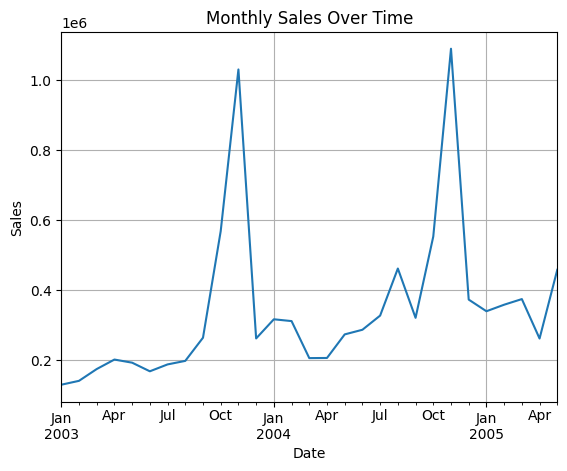

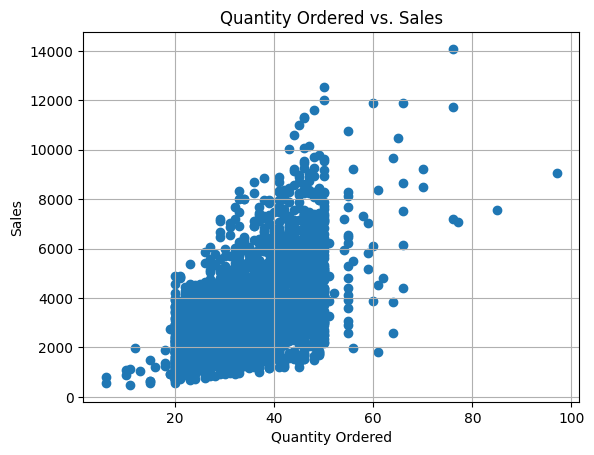

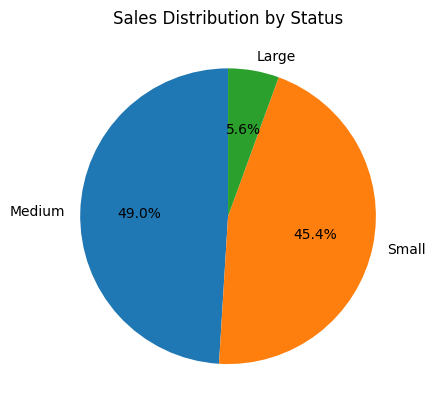

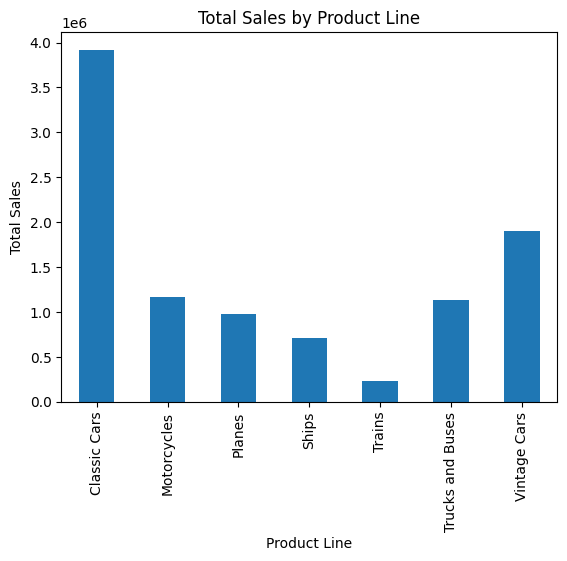

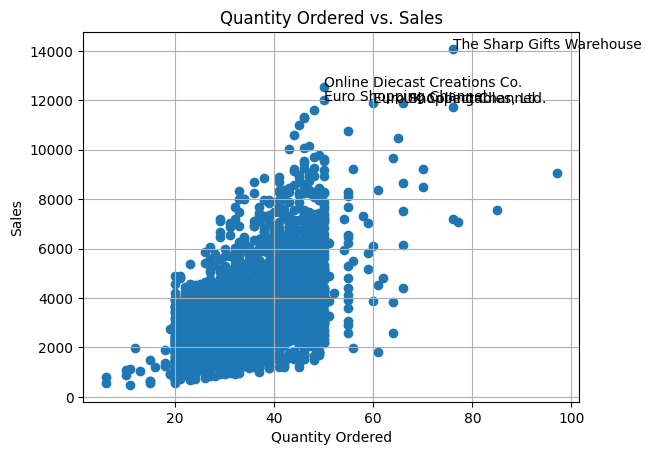

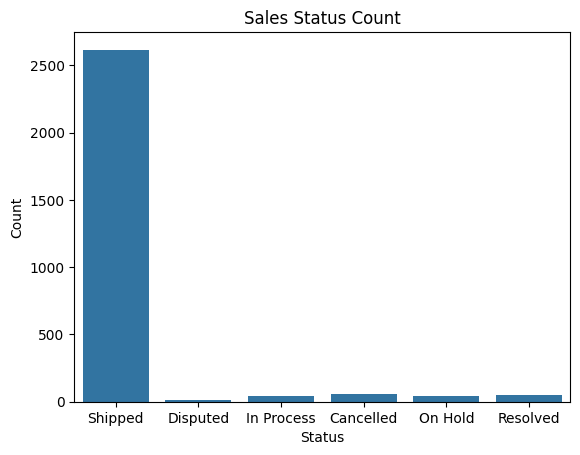

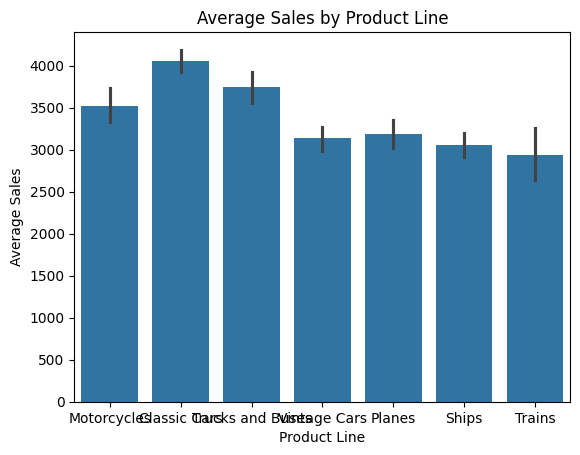

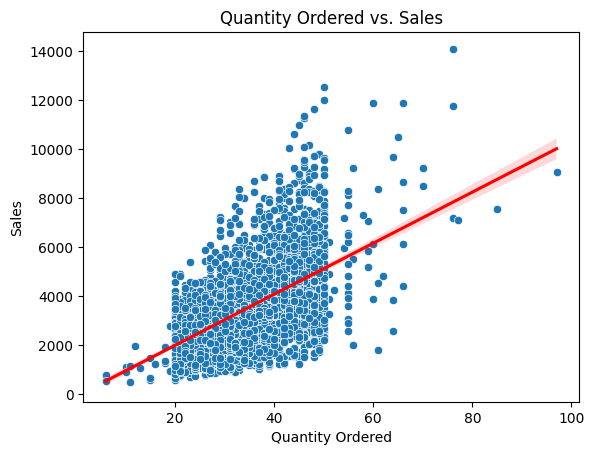

In [17]:
#Uploading and loading data
uploaded = files.upload()
file_name = next(iter(uploaded))
sales_data = pd.read_csv(file_name, encoding='latin1')

# Data Cleaning
sales_data.drop(columns=['ADDRESSLINE2', 'STATE', 'TERRITORY'], inplace=True)
sales_data['POSTALCODE'].fillna('Unknown', inplace=True)
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')

# Line Plot
sales_data.set_index('ORDERDATE')['SALES'].resample('M').sum().plot(title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Scatter Plot
plt.scatter(sales_data['QUANTITYORDERED'], sales_data['SALES'])
plt.title('Quantity Ordered vs. Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Pie Chart
sales_data['DEALSIZE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Sales Distribution by Status')
plt.ylabel('')
plt.show()
# Bar Plot
sales_data.groupby('PRODUCTLINE')['SALES'].sum().plot.bar(title='Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

# Enhanced Scatter Plot
plt.scatter(sales_data['QUANTITYORDERED'], sales_data['SALES'], alpha=1)
plt.title('Quantity Ordered vs. Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
for i, row in sales_data.nlargest(5, 'SALES').iterrows():
    plt.annotate(row['CUSTOMERNAME'], (row['QUANTITYORDERED'], row['SALES']))
plt.show()

# Histogram
px.histogram(sales_data, x='SALES', nbins=50, title='Sales Distribution').show()

# Bar Plot
px.bar(sales_data.groupby('PRODUCTLINE')['SALES'].sum().reset_index(),
       x='PRODUCTLINE', y='SALES', title='Total Sales by Product Line').show()


# Countplot
sns.countplot(data=sales_data, x='STATUS').set(title='Sales Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
# Barplot
sns.barplot(data=sales_data, x='PRODUCTLINE', y='SALES', estimator=np.mean).set(title='Average Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales')
plt.show()

# Scatterplot with Regression Line
sns.scatterplot(data=sales_data, x='QUANTITYORDERED', y='SALES')
sns.regplot(data=sales_data, x='QUANTITYORDERED', y='SALES', scatter=False, color='red').set(title='Quantity Ordered vs. Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

TASK-9. Geospatial Analysis
   - Utilize latitude and longitude data for creating maps and charts.
   - Plot customer distribution and sales hotspots on a map.
**bold text**

In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/sales_data_sample.csv", encoding='latin1')

first_10_sections = data['CITY'].head(10)
print(first_10_sections)

0              NYC
1            Reims
2            Paris
3         Pasadena
4    San Francisco
5       Burlingame
6            Lille
7           Bergen
8    San Francisco
9            Paris
Name: CITY, dtype: object


In [19]:
import folium

# Sample data: List of cities with latitude and longitude
cities = [
    {"name": "New York", "latitude": 40.7128, "longitude": -74.0060},
    {"name": 'Reims', "latitude": 49.2583, "longitude": 4.0317},
    {"name": "Paris", "latitude": 48.8566, "longitude": 2.3522},
    {"name": 'Pasadena', "latitude": 34.1478, "longitude": -118.1445},
    {"name": 'San Francisco', "latitude": 37.7749, "longitude": -122.4194},
    {"name": 'Burlingame', "latitude": 37.5841, "longitude": -122.3661},
    {"name": 'Lille', "latitude": 50.6293, "longitude": 3.0573},
    {"name": 'Bergen', "latitude": 60.3913, "longitude": 5.3221},
    {"name": 'San Francisco', "latitude": 37.7749, "longitude": -122.4194},

]

# Create a base map centered around the average latitude and longitude of the cities
m = folium.Map(location=[20, 0], zoom_start=2)

# Add city markers to the map
for city in cities:
    folium.Marker(
        location=[city["latitude"], city["longitude"]],
        popup=city["name"],
        icon=folium.Icon(icon="cloud")
    ).add_to(m)
m